# Module 5.3 — Volatility Regime Shift

## Objective

Examine how a change in variance affects drawdowns and psychological experience,    
while keeping expectancy constant.

Unlike previous modules, edge does not change.      
Only outcome dispersion changes.

## Simulation Design

- Trades 1–500: Low variance regime
- Trades 501–1000: High variance regime
- Expectancy remains identical in both regimes

## Tasks

1. Compare drawdown depth
2. Compare drawdown duration
3. Compare recovery time
4. Compare equity curve smoothness

## Core Questions

- How does variance affect emotional experience?
- Why can identical edge feel completely different?
- How does volatility impact survivability?




In [1]:
import numpy as np
import matplotlib.pyplot as plt


low_var_R = 1
high_var_R = 5

In [2]:
def simulate_volatility_shift(n_trades = 1000):

    returns = []

    for i in range(n_trades):

        if i < 500:
            # low variance
            win = 0.55
            win_size = low_var_R
            loss_size = -low_var_R
        else:
            # High variance regime (same expectancy)
            win = 0.55
            win_size = high_var_R
            loss_size = -high_var_R

        r = win_size if np.random.rand() < win else loss_size
        returns.append(r)

    equity = np.cumsum(returns)

    return equity, np.array(returns) 
    



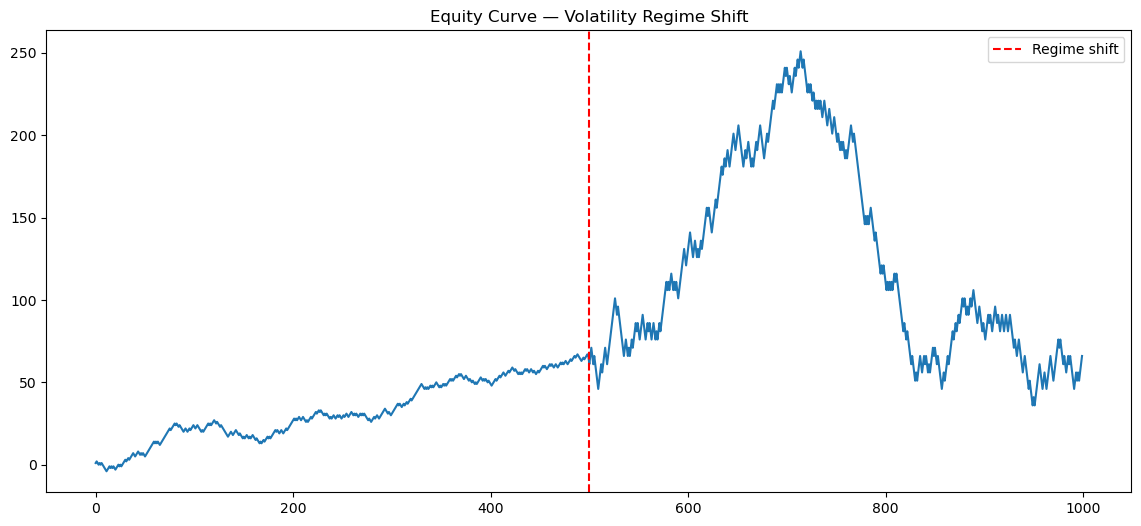

In [3]:
equity, returns = simulate_volatility_shift()

plt.figure(figsize=(14,6))
plt.plot(equity)
plt.axvline(500, color='red', linestyle='--', label = 'Regime shift')
plt.title("Equity Curve — Volatility Regime Shift")
plt.legend()
plt.show()

## Drawdown Function

In [4]:
def compute_drawdowns(equity):
    peak = np.maximum.accumulate(equity)
    drawdown = equity - peak

    max_dd = np.min(drawdown)

    return drawdown, max_dd


## Compare Regimes

In [5]:
eq_low = equity[:500]
eq_high = equity[500:]

dd_low, max_dd_low = compute_drawdowns(eq_low)
dd_high, max_dd_high = compute_drawdowns(eq_high)

print("Max drawdown (Low variance):", max_dd_low)
print("Max drawdown (High variance):", max_dd_high)

Max drawdown (Low variance): -14
Max drawdown (High variance): -215


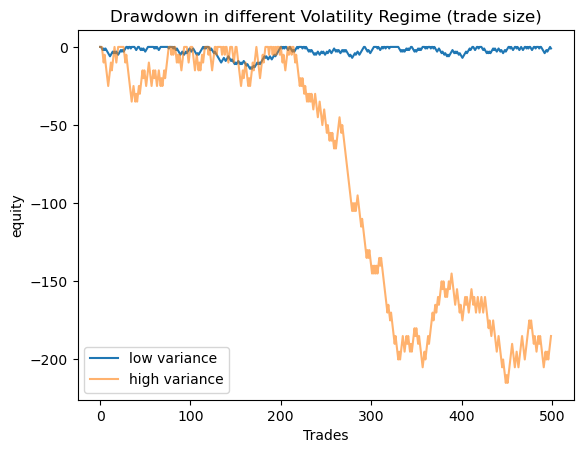

In [6]:
plt.figure()
plt.plot(dd_low , alpha = 1, label = 'low variance')
plt.plot(dd_high, alpha = 0.6, label = 'high variance')

plt.title('Drawdown in different Volatility Regime (trade size)')
plt.xlabel('Trades')
plt.ylabel('equity')
plt.legend()

plt.show()

## Monte Carlo Comparison

In [7]:
n_runs = 50

low_dds = []
high_dds = []

for _ in range(n_runs):

    equity, _ = simulate_volatility_shift()

    dd_low, max_dd_low = compute_drawdowns(equity[:500])
    dd_high, max_dd_high = compute_drawdowns(equity[500:])

    low_dds.append(max_dd_low)
    high_dds.append(max_dd_high)

print("Average Max DD Low:", np.mean(low_dds))
print("Average Max DD High:", np.mean(high_dds))


Average Max DD Low: -14.96
Average Max DD High: -75.1


# Observation

When trade variance increases while expectancy remains constant:

- Equity curve volatility increases dramatically.
- Maximum drawdown expands non-linearly.
- Psychological pressure increases significantly.
- Survivability decreases despite identical mathematical edge.

Variance scales with the square of return magnitude, meaning increasing R-multiple size amplifies drawdown risk disproportionately.

## Conclusion:
Expectancy alone is insufficient to evaluate a strategy.    
Variance and position sizing determine survivability.   